In [6]:
import nltk
import re
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
paragraph = "The significant purpose test protects clients' ability to seek bona fide legal advice from lawyers in situations where legal and non-legal purposes can't be separated. The Ninth Circuit's primary purpose test denies the privilege to communications that have a legal purpose anytime a court later finds that the non-legal purpose outweighs the legal purpose even by a little bit. Taken seriously, that test requires parties and courts to disentangle competing purposes and to identify the single most important one. That is an inherently impossible exercise, and it creates the kind of uncertainty this Court warned against in Upjohn."

I tokenize the paragraph into sentences.

In [8]:
ps = PorterStemmer()
wordNet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []

In [9]:
print(sentences)

["The significant purpose test protects clients' ability to seek bona fide legal advice from lawyers in situations where legal and non-legal purposes can't be separated.", "The Ninth Circuit's primary purpose test denies the privilege to communications that have a legal purpose anytime a court later finds that the non-legal purpose outweighs the legal purpose even by a little bit.", 'Taken seriously, that test requires parties and courts to disentangle competing purposes and to identify the single most important one.', 'That is an inherently impossible exercise, and it creates the kind of uncertainty this Court warned against in Upjohn.']


Here, I loop through the sentences within our paragraph (as I have tokenized by sentence, and not word) and perform the following preprocessing tasks:
1. Converting the sentence to lowercase.
2. Removing all characters that are not a part of the Latin script.
3. Splitting the sentence into an array of words.
4. Applying Porter's Stemming Algorithm to each word in the sentence, that isnt a stopword.
5. Adding a space at the end to make sure there's a space in between each word.

In [12]:
for i in range (len(sentences)):
  review = re.sub('[^a-zA-Z]', ' ', sentences[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [13]:
print(corpus)

['signific purpos test protect client abil seek bona fide legal advic lawyer situat legal non legal purpos separ', 'ninth circuit primari purpos test deni privileg commun legal purpos anytim court later find non legal purpos outweigh legal purpos even littl bit', 'taken serious test requir parti court disentangl compet purpos identifi singl import one', 'inher imposs exercis creat kind uncertainti court warn upjohn', 'signific purpos test protect client abil seek bona fide legal advic lawyer situat legal non legal purpos separ', 'ninth circuit primari purpos test deni privileg commun legal purpos anytim court later find non legal purpos outweigh legal purpos even littl bit', 'taken serious test requir parti court disentangl compet purpos identifi singl import one', 'inher imposs exercis creat kind uncertainti court warn upjohn']


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer(max_features = 1500)
x = CV.fit_transform(corpus).toarray();
print(CV.get_feature_names())
print(len(CV.get_feature_names()))

['abil', 'advic', 'anytim', 'bit', 'bona', 'circuit', 'client', 'commun', 'compet', 'court', 'creat', 'deni', 'disentangl', 'even', 'exercis', 'fide', 'find', 'identifi', 'import', 'imposs', 'inher', 'kind', 'later', 'lawyer', 'legal', 'littl', 'ninth', 'non', 'one', 'outweigh', 'parti', 'primari', 'privileg', 'protect', 'purpos', 'requir', 'seek', 'separ', 'serious', 'signific', 'singl', 'situat', 'taken', 'test', 'uncertainti', 'upjohn', 'warn']
47


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
BOW = pd.DataFrame(x, columns = CV.get_feature_names())
BOW

,abil,advic,anytim,bit,bona,circuit,client,commun,compet,court,...,separ,serious,signific,singl,situat,taken,test,uncertainti,upjohn,warn
0,1,1,0,0,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
4,1,1,0,0,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
5,0,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1


Now, from this Bag-of-Words, we can see that our paragraph had 8 sentences, and 47 different unique words within the entire corpus.

### TF-IDF Model


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
TFIDF = tfIdfVectorizer.fit_transform(corpus)

TFIDFdf = pd.DataFrame(TFIDF.toarray(), columns = tfIdfVectorizer.get_feature_names())
TFIDFdf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abil,advic,anytim,bit,bona,circuit,client,commun,compet,court,...,separ,serious,signific,singl,situat,taken,test,uncertainti,upjohn,warn
0,0.232483,0.232483,0.000000,0.000000,0.232483,0.000000,0.232483,0.000000,0.000000,0.000000,...,0.232483,0.000000,0.232483,0.000000,0.232483,0.000000,0.138620,0.00000,0.00000,0.00000
1,0.000000,0.000000,0.199507,0.199507,0.000000,0.199507,0.000000,0.199507,0.000000,0.118958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118958,0.00000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300603,0.179237,...,0.000000,0.300603,0.000000,0.300603,0.000000,0.300603,0.179237,0.00000,0.00000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.34595,0.34595,0.34595
4,0.232483,0.232483,0.000000,0.000000,0.232483,0.000000,0.232483,0.000000,0.000000,0.000000,...,0.232483,0.000000,0.232483,0.000000,0.232483,0.000000,0.138620,0.00000,0.00000,0.00000
5,0.000000,0.000000,0.199507,0.199507,0.000000,0.199507,0.000000,0.199507,0.000000,0.118958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118958,0.00000,0.00000,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300603,0.179237,...,0.000000,0.300603,0.000000,0.300603,0.000000,0.300603,0.179237,0.00000,0.00000,0.00000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.34595,0.34595,0.34595


In [25]:
from wordcloud import WordCloud

WC = WordCloud(width = 1000, height = 1000, background_color = 'cyan',
               stopwords = stopwords.words('english'), min_font_size=20).generate(paragraph)

<function matplotlib.pyplot.show(*args, **kw)>

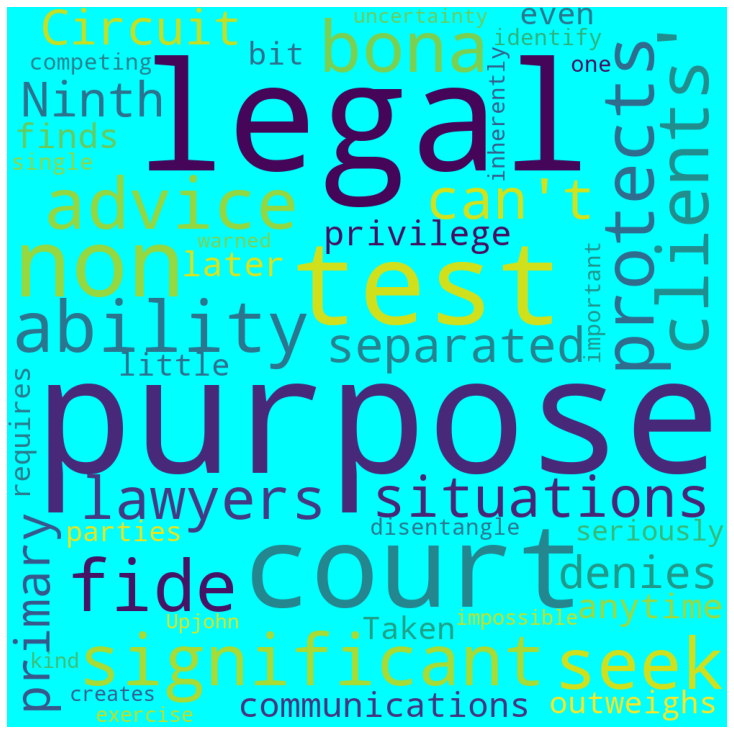

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(WC)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show();